In [ ]:
# Data Preprocessing
import pandas as pd
import numpy as np

# Visual plots
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Model 1 & 2
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
# Task 1: Read the 1st 15 columns only
df = pd.read_csv('weather.csv')
df = df.iloc[:, :15]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     333 non-null    object 
 8   WindDir3pm     364 non-null    object 
 9   WindSpeed9am   357 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 43.0+ KB


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5


In [ ]:
# Task 2: Data pre-processing
# 2.1: Check for and fix null values

# 1. Remove columns with dtype: 'string'
df.drop(columns=['WindGustDir','WindDir9am','WindDir3pm'],inplace=True)

# 2. Fix: Mean of ALL values in the column
mean = df.mean()
df.fillna(mean,inplace=True)
null_count = df.isnull().sum().sum()
print(null_count)

# 3. Convert int64 to float64 for similarity
df['WindSpeed3pm'] = df['WindSpeed3pm'].astype('float64')
df['Humidity9am'] = df['Humidity9am'].astype('float64')
df['Humidity3pm'] = df['Humidity3pm'].astype('float64')

df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustSpeed  366 non-null    float64
 6   WindSpeed9am   366 non-null    float64
 7   WindSpeed3pm   366 non-null    float64
 8   Humidity9am    366 non-null    float64
 9   Humidity3pm    366 non-null    float64
 10  Pressure9am    366 non-null    float64
 11  Pressure3pm    366 non-null    float64
dtypes: float64(12)
memory usage: 34.4 KB


In [ ]:
# Task: Encode the categorical data, using OneHotEncoder.
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df.select_dtypes(include=['float64']))

num_df = df.select_dtypes(exclude=['float64'])
cat_df = pd.DataFrame(enc.transform(df.select_dtypes(include=['float64'])).toarray(),
                      columns=enc.get_feature_names_out(df.select_dtypes(include=['float64']).columns))
encoded_df = pd.concat([num_df, cat_df], axis=1)

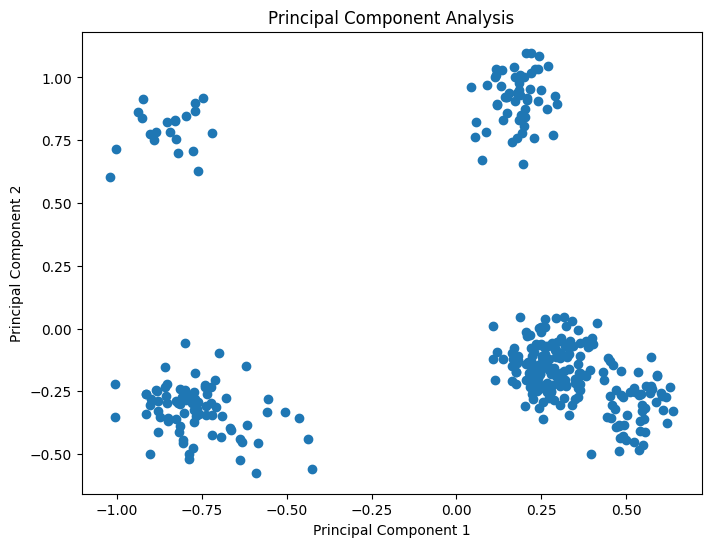

In [ ]:
# Task: Performing Principal Component Analysis
X = encoded_df

pca = PCA(n_components=2)
p_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=p_components, columns=['C1', 'C2'])

# Visualize the final columns
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['C1'], pca_df['C2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

In [ ]:
# I re-imported the dataset because the current dataset doesn't contain the output column.
y = pd.read_csv('weather.csv')['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# vector.shape: I did it to see the number of elements in each dimension
print("Shaped data: ")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Shaped data: 
X_train: (311, 1186)
y_train: (311,)
X_test: (55, 1186)
y_test: (55,)


In [ ]:
# Model 1 :Gaussian Naive Bayes classifier
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

# Evaluate the model (example: accuracy)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("Model 1 (Gaussian Naive Bayes Classifier): ")
print(f"Accuracy: {nb_accuracy}")

print("Classification Report:")
print(classification_report(y_test, nb_y_pred))

Model 1 (Gaussian Naive Bayes Classifier): 
Accuracy: 0.7636363636363637
Classification Report:
              precision    recall  f1-score   support

          No       0.78      0.98      0.87        43
         Yes       0.00      0.00      0.00        12

    accuracy                           0.76        55
   macro avg       0.39      0.49      0.43        55
weighted avg       0.61      0.76      0.68        55



In [ ]:
# Model 2: Multi-Layer Perceptron classifier
epochs = 500

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=epochs, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_y_pred = mlp_model.predict(X_test)

print("Model 2 (Multi-Layer Perceptron): ")

mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print(f"Accuracy: {mlp_accuracy}")

print("MLP Classification Report:")
print(classification_report(y_test, mlp_y_pred))

Model 2 (Multi-Layer Perceptron): 
Accuracy: 0.8
MLP Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89        43
         Yes       1.00      0.08      0.15        12

    accuracy                           0.80        55
   macro avg       0.90      0.54      0.52        55
weighted avg       0.84      0.80      0.73        55



In [ ]:
# Task: Compare between the 2 models
# Variables:
# Accuracy: nb_accuracy, mlp_accuracy
# y_predicted: nb_y_pred, mlp_y_pred

print("Comparison between Naive Bayes Classifier and Multi-Layer Perceptron:")

print('Model 1 (Naive Bayes Classifier):')
print("Accuracy:", nb_accuracy)
print("Classification Report:")
print(classification_report(y_test, nb_y_pred))

print("Model 2 (Multi-Layer Perceptron):")
print("Accuracy:", mlp_accuracy)

print("Classification Report:")
print(classification_report(y_test, mlp_y_pred))

def compare_accuracy(acc_model1, acc_model2):
    if acc_model1 > acc_model2:
        print("Naive Bayes model performed better in terms of accuracy.")
    elif acc_model2 > acc_model1:
        print("MLP performed better in terms of accuracy.")
    else:
        print("Both Models 1 & 2 performed similarly")

print("Final Analysis: ",end='')
compare_accuracy(nb_accuracy,mlp_accuracy)

Comparison between Naive Bayes Classifier and Multi-Layer Perceptron:
Model 1 (Naive Bayes Classifier):
Accuracy: 0.7636363636363637
Classification Report:
              precision    recall  f1-score   support

          No       0.78      0.98      0.87        43
         Yes       0.00      0.00      0.00        12

    accuracy                           0.76        55
   macro avg       0.39      0.49      0.43        55
weighted avg       0.61      0.76      0.68        55

Model 2 (Multi-Layer Perceptron):
Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89        43
         Yes       1.00      0.08      0.15        12

    accuracy                           0.80        55
   macro avg       0.90      0.54      0.52        55
weighted avg       0.84      0.80      0.73        55

Final Analysis: MLP performed better in terms of accuracy.
